In [147]:
import numpy as np
import matplotlib.pyplot as plt
N = 12

In [148]:
def func(x):
    return x * x * np.sin(x)

vectorize_func = np.vectorize(func)

In [149]:
localization_segment_x = np.linspace(-1.5,1.5, N)

In [150]:
localization_segment_y = vectorize_func(localization_segment_x)

In [151]:
def interpolation_polynomial(localization_segment_y, localization_segment_x, x, N):
    res = np.array([localization_segment_y[i] for i in range(N)], dtype = "float64")
    for i in range(N):
        for j in range(N):
            if i != j:
                res[i] *= (x-localization_segment_x[j])
                res[i] /= (localization_segment_x[i] - localization_segment_x[j])
    return sum(res)
        

In [152]:
def get_error():
    return [np.abs(interpolation_polynomial(localization_segment_y, localization_segment_x, elem, N) - func(elem)) for elem in np.linspace(-1.5,1.5,1000)]

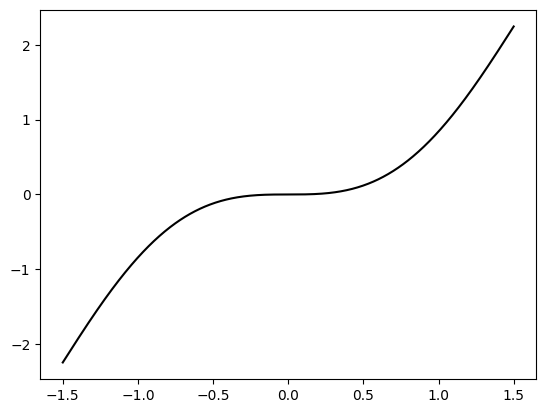

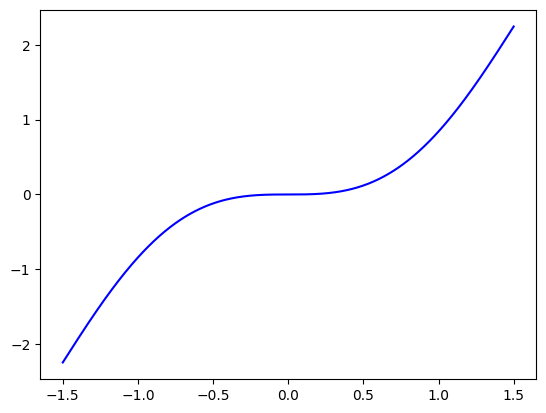

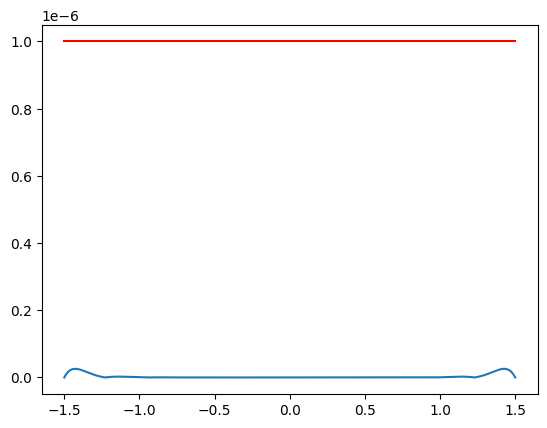

In [153]:
tmp_linspace = np.linspace(-1.5,1.5,1000)

plt.plot(tmp_linspace, vectorize_func(tmp_linspace), color = "black")
plt.show()
plt.plot(tmp_linspace, [interpolation_polynomial(localization_segment_y, localization_segment_x, elem, N) for elem in tmp_linspace], color = "blue")
plt.show()
plt.plot(tmp_linspace, [1e-6 for _ in range(1000)], color= "red")
plt.plot(tmp_linspace, get_error())
plt.show()

### Задание 5.3 ###

В таблице  5.2  приведены данные о численности населения некоторых крупнейших стран мира по годам с 1950 -2000 г.г. Заполнить последние два столбца таблицы (взять сведения из интернета).  На основе этих данных для конкретного варианта построить наилучший многочлен  по МНК.  Найти численность  населения страны  в 2023 году  и сравнить полученное значение  с актуальным значением  (взять из интернета).
Решить ту же  задачу на основе интерполяционного многочлена.  То есть построить интерполяционный многочлен по значениям с 1950-2020 г.г и выполнить прогноз на 2023 год.  Сравнить с актуальными данными.  Составить отчет по задаче.


In [112]:
def get_factors_mnk(n, x):
    res = [sum([elem ** k for elem in x]) for k in range(2*n)]
    return res

[np.float64(8.0),
 np.float64(15880.0),
 np.float64(31526000.0),
 np.float64(62595784000.0),
 np.float64(124302281960000.0),
 np.float64(2.468714591608e+17),
 np.float64(4.9036603235017995e+20),
 np.float64(9.74153792194353e+23),
 np.float64(1.935495888727935e+27),
 np.float64(3.846046070984149e+30),
 np.float64(7.643532628920011e+33),
 np.float64(1.5192564183344233e+37),
 np.float64(3.0201272559736026e+40),
 np.float64(6.00449512447405e+43),
 np.float64(1.1939460850172454e+47),
 np.float64(2.374377491095815e+50)]

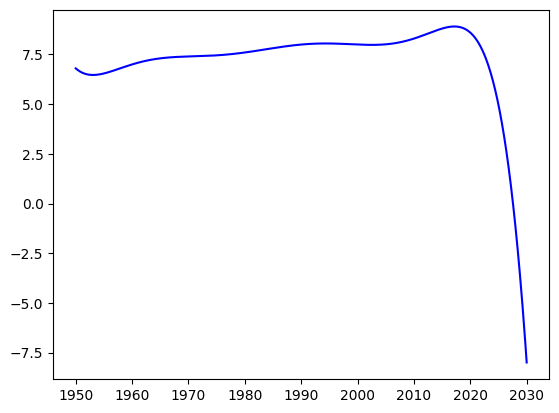

In [113]:
N = 5
Austria_population_on_year = np.array([6.8, 7, 7.4, 7.6, 8, 8, 8.3, 8.6])
tmp_linspace = np.linspace(1950,2030,1000)
year = np.array([1950.0, 1960.0, 1970.0, 1980.0, 1990.0, 2000.0 ,2010.0, 2020.0])
every_year = [1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
population_every_year = [6.936,6.930,6.927,6.931,6.939,6.946,6.951,6.965,6.986,7.013,7.046,7.085,7.128,7.174,7.222,7.269,7.320, 7.375,7.413,7.439, 7.465, 7.498, 7.542, 7.548, 7.597, 7.576, 7.563, 7.566, 7.560, 7.547, 7.547, 7.566, 7.571, 7.559, 7.558, 7.562, 7.567, 7.572, 7.583, 7.619, 7.678,  7.755, 7.840, 7.905, 7.935, 7.947, 7.958, 7.967, 7.975, 7.991 ,8.010 , 8.039 , 8.078, 8.120, 8.171, 8.227, 8.267, 8.294, 8.321, 8.342, 8.362, 8.391, 8.429, 8.479, 8.546, 8.642, 8.736, 8.797, 8.840, 8.879, 8.907, 8.922, 8.939, 8.958, 8.977, 8.994, 9.009, 9.023, 9.036, 9.046, 9.054]
plt.plot(tmp_linspace, [interpolation_polynomial(Austria_population_on_year, year, elem, 8) for elem in tmp_linspace], color = "blue")
get_factors_mnk(8,year)

In [114]:
def MNK(n, y, x):
    matrix = np.zeros((n, n))
    b = np.zeros(n)
    for i in range(n):
        for j in range(n):
            for k in range(len(x)):
                matrix[i][j] += x[k]**(i+j)

        for k in range(len(x)):
            b[i] += y[k] * x[k]**i
    return np.linalg.solve(matrix, b)

def Polynom(x, coeffs):
    ans = 0 
    for i in range(len(coeffs)):
        ans += coeffs[i] * x ** i

    return ans


n = 3
coeffs = MNK(n, Austria_population_on_year, year)


eps = 1e-3
def SKO(Polynom, y, n):
    ans = 0
    for i in range(len(year)):
        ans += (Polynom[i] - y[i]) ** 2

    print(np.sqrt((1/(n+1))*ans))
    return np.sqrt((1/(n+1))*ans)

for i in range(1, len(year)):
    coeffs = MNK(i, Austria_population_on_year, year)
    SKO(Polynom(year, coeffs), Austria_population_on_year, i)
    

1.1723374087693355
0.12677313820927746
0.10125698094686783
0.08849389263019657
0.08111310425284052
0.06856039142851766
0.07006626932267192


In [115]:
def f_new(a,x):
    ans = 0
    for i in range(len(a)):
        ans += a[i]*x**i
    return ans

def sigma(a,x,y):
    s = 0
    for i in range(8):
        s += (f_new(a,x[i]) - y[i])**2
    return (s/9)**(1/2)

for i in range(0,8):
    print(sigma(A[i], year, Austria_population_on_year), "Степень многочлена равна ",i)

0.5526451543863085 Степень многочлена равна  0
0.07319250547114037 Степень многочлена равна  1
0.06750465396458967 Степень многочлена равна  2
0.06595945233449435 Степень многочлена равна  3
0.06759278365728225 Степень многочлена равна  4
0.06561594647864563 Степень многочлена равна  5
0.05309227454022466 Степень многочлена равна  6
0.05773700441967142 Степень многочлена равна  7


In [116]:
matrix = [[get_factors_mnk(N,year)[i + j] for i in range(N)] for j in range(N)]
res_vector = [sum([Austria_population_on_year[i] * year[i] ** k for i in range(8)]) for k in range(N)]
def get_val (res, x):
    return res[0] + res[1] * x + res[2] * x * x + res[3] * x * x * x + res[4] * x ** 4

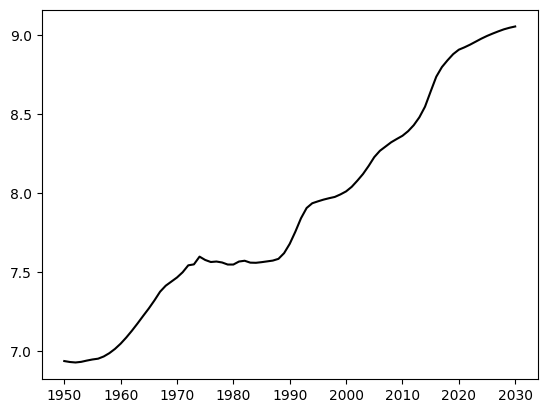

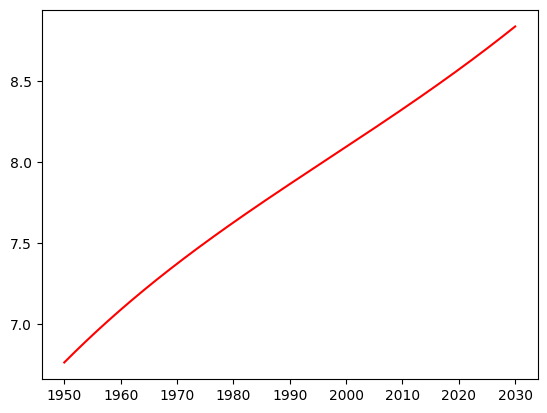

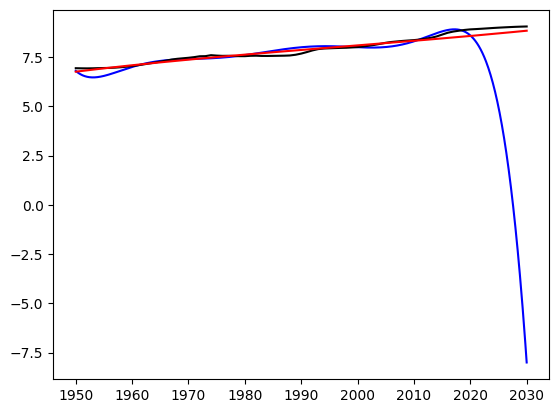

In [117]:
plt.show()
plt.plot(every_year, population_every_year, color = "black")
plt.show()
plt.plot(tmp_linspace, [get_val(np.linalg.solve(matrix, res_vector), x) for x in tmp_linspace], color = "red")
plt.show()
plt.plot(tmp_linspace, [interpolation_polynomial(Austria_population_on_year, year, elem, 8) for elem in tmp_linspace], color = "blue")
plt.plot(every_year, population_every_year, color = "black")
plt.plot(tmp_linspace, [get_val(np.linalg.solve(matrix, res_vector), x) for x in tmp_linspace], color = "red")
plt.show()

Массовое вымирание Австрийцев 

Задача 5.2. Функция $f(x)$ является кусочно-гладкой функцией. Приблизить функцию  многочленом Лагранжа степени $N$, где $N$ найдено  в задаче 5.1. Предложить и реализовать способ интерполяции, при котором величина погрешности не будет превышать величины  $ε = 10^{-10}$.

In [157]:
def abs_func(x):
    return x * x * np.abs(np.sin(x))

def get_error_2():
    return [np.abs(interpolation_polynomial(localization_segment_y, localization_segment_x, elem, N) - abs_func(elem)) for elem in np.linspace(-1.5,1.5,1000)]

$N = 12$


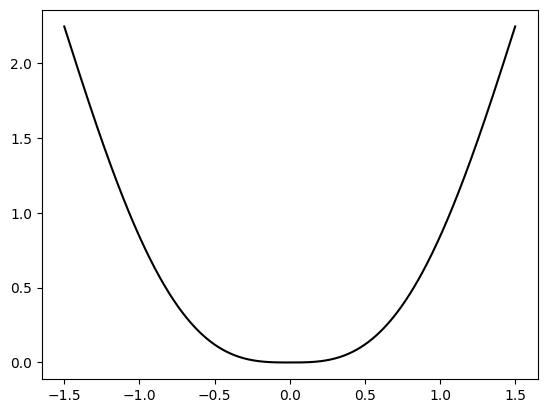

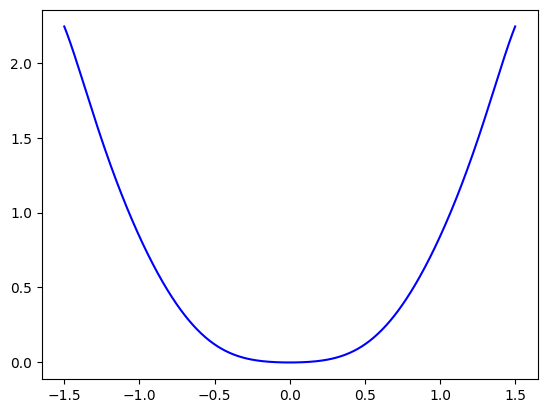

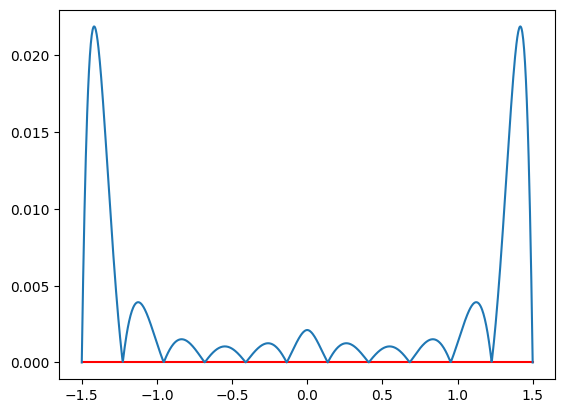

In [158]:
tmp_linspace = np.linspace(-1.5,1.5,1000)
N = 12
localization_segment_x = np.linspace(-1.5,1.5, N)
localization_segment_y = abs_func(localization_segment_x)
plt.plot(tmp_linspace, abs_func(tmp_linspace), color = "black")
plt.show()
plt.plot(tmp_linspace, [interpolation_polynomial(localization_segment_y, localization_segment_x, elem, N) for elem in tmp_linspace], color = "blue")
plt.show()
plt.plot(tmp_linspace, [1e-6 for _ in range(1000)], color= "red")
plt.plot(tmp_linspace, get_error_2())
plt.show()

In [199]:
n = 5

def f_1(x):
    return -np.sin(x) * x * x
def f_2(x):
    return np.sin(x) * x * x

x_left_nodes = np.linspace(-1.5, 0, n)
x_right_nodes = np.linspace(0, 1.5, n)

y_left_nodes = abs_func(x_left_nodes)
y_right_nodes = abs_func(x_right_nodes)

x_before = np.linspace(-1.5, 0, 200)
x_after = np.linspace(0, 1.5, 200)
x_values = np.linspace(-1.5, 1.5, 400)
y_values = abs_func(x_values)

In [200]:
def RL_1(t, t_arr, y_arr):
    return np.abs(f_1(t) - interpolation_polynomial(y_arr,t_arr, t,len(t_arr)))

def RL_2(t, t_arr, y_arr):
    return np.abs(f_2(t) - interpolation_polynomial(y_arr,t_arr, t,len(t_arr)))

RL_1V = [RL_1(t, x_left_nodes, y_left_nodes) for t in x_before]
RL_2V = [RL_2(t, x_right_nodes, y_right_nodes) for t in x_after]
eps = 1e-10

In [201]:
while np.max(RL_1V) > eps or np.max(RL_2V) > eps:
    n += 1
    x_left_nodes = np.linspace(-1.5, 0, n)
    y_left_nodes = f_1(x_left_nodes)
    x_right_nodes = np.linspace(0, 1.5, n)
    y_right_nodes = f_2(x_right_nodes)
    RL_1V = [RL_1(t, x_left_nodes, y_left_nodes) for t in x_before]
    RL_2V = [RL_2(t, x_right_nodes, y_right_nodes) for t in x_after]
print(f'Максимальная величина полученной погрешности приближения: {max(np.max(RL_1V), np.max(RL_2V))}')
interpolation_nodes = n + 1
print(f'Число отрезков разбиения: {n}, число узлов интерполяции: {interpolation_nodes}')

Максимальная величина полученной погрешности приближения: 4.115774387969395e-11
Число отрезков разбиения: 12, число узлов интерполяции: 13


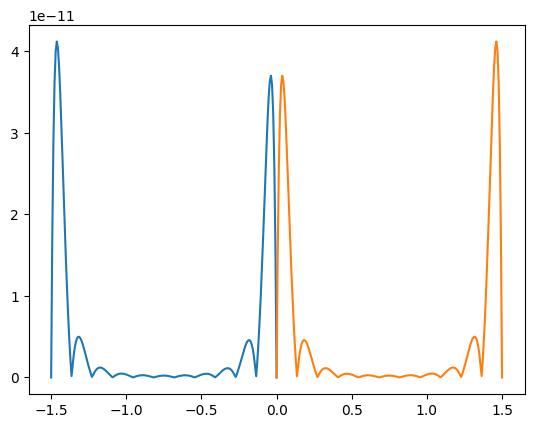

In [202]:
plt.plot(x_before, RL_1V)
plt.plot(x_after, RL_2V)

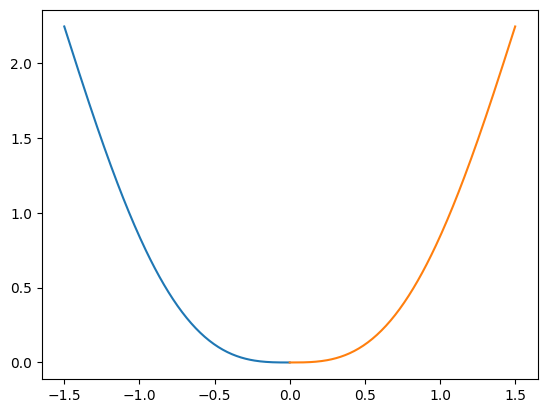

In [213]:

lagrange_left = [interpolation_polynomial(y_left_nodes,x_left_nodes, t, len(y_left_nodes)) for t in x_before]
lagrange_right = [interpolation_polynomial(y_right_nodes,x_right_nodes, t, len(y_right_nodes)) for t in x_after]
plt.plot(x_before, lagrange_left)
plt.plot(x_after, lagrange_right)

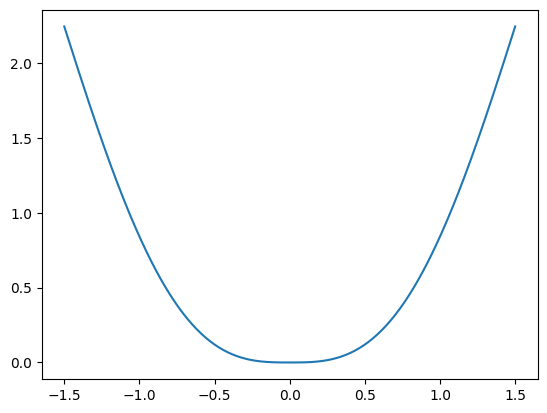

In [214]:
plt.plot(x_values, abs_func(x_values))